<a href="https://colab.research.google.com/github/cernavcii/MyFirstRepo/blob/main/QS_World_University_Rankings_2025_i%C3%A7in_S%C4%B1n%C4%B1flama_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report # Import the function

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_excel('QS 2025 rank.xlsx', sheet_name='Sheet1',index_col=0)


In [ ]:
y = data['rank']  # Or the appropriate column for your target variable
X = data.drop('rank', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Convert numpy arrays back to pandas DataFrames
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Drop rows with any missing values in either X_train or X_test
X_train = X_train.dropna(axis=0) # Drop rows with missing values
y_train = y_train[X_train.index]  # Keep corresponding target values

X_test = X_test.dropna(axis=0) # Drop rows with missing values
y_test = y_test[X_test.index]





<ipython-input-7-a50ad83433dc>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train = y_train[X_train.index]  # Keep corresponding target values
<ipython-input-7-a50ad83433dc>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test = y_test[X_test.index]


# **Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


**Sınıflandırma Raporu**

In [ ]:
# Accuracy (Doğruluk Skoru)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70




*  Doğru sınıflandırma oranıdır.
*  Model yüksek doğruluğa sahiptir bu da modelin çoğu örneği doğru tahmin ettiğini gösterir.



In [ ]:
# Precision (Kesinlik skoru):
precision = precision_score(y_test, y_pred, average='macro') # Set average to 'micro', 'macro', or 'weighted'
print(f"Precision: {precision:.2f}")

Precision: 0.60




*   Pozitif sınıf tahminlerinin başarı oranıdır.
*   Model precision skoru yüksektir yani modelin pozitif tahminlerinin çoğunun doğru olduğunu gösterir.




In [ ]:
# Recall (Duyarlılık):
recall = recall_score(y_test, y_pred ,average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.61




*   Pozitif sınıfın doğru tahmin edilme oranıdır.
*   Modelin gerçek pozitiflerin çoğunu doğru tahmin ettiğini gösterir.



In [ ]:
# F1 Score
f1 = f1_score(y_test, y_pred,average='macro') # Set average to 'micro', 'macro', or 'weighted'
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.59




*   Precision ve recall değerlerinin harmonik ortalamasıdır. Dengeli bir performans ölçütüdür.
*   Model yüksek bir F1 score değerine sahiptir. Bu da modelin iyi bir denge kurduğunu gösterir.



In [ ]:
# Değerler toplu olarak görülmek istenirse :
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

       1-300       0.76      0.88      0.82        83
   1001-1400       0.73      0.79      0.76       108
       1401+       0.12      0.03      0.05        30
     301-600       0.75      0.50      0.60        96
    601-1000       0.63      0.85      0.72        89

    accuracy                           0.70       406
   macro avg       0.60      0.61      0.59       406
weighted avg       0.67      0.70      0.67       406



*SINIF PERFORMANSLARI*

**Sınıf 1-300 :**


*   **Precision (0.76):** Modelin, sınıf 1-300 olarak tahmin ettiği örneklerin %76'sı gerçekten sınıf 1-300.
*   **Recall (0.88):** Gerçekten sınıf 1-300 olan örneklerin %88'i doğru olarak sınıf 1-300 olarak tahmin edilmiş.
*   **F1-Score (0.82):** Precision ve Recall'un dengeli bir ölçümü. Yüksek bir değer, modelin bu sınıfta iyi performans gösterdiğini belirtir.
*   **Support (83):** Veri setinde 83 tane gerçek sınıf 1-300 örneği var.

**Sınıf 1001-1400 :**


*   **Precision (0.73):** Modelin, sınıf 1001-1400 olarak tahmin ettiği örneklerin %73'ü gerçekten sınıf 1-300.
*   **Recall (0.79):** Gerçekten sınıf 1001-1400 olan örneklerin %79'u doğru olarak sınıf 1001-1400 olarak tahmin edilmiş.
*   **F1-Score (0.76):** Bu sınıf için de iyi bir performansı işaret eder.
*   **Support (108):** Veri setinde 108 tane gerçek sınıf 1001-1400 örneği var.

**Sınıf 1401+ :**


*   **Precision (0.12):** Modelin, sınıf 1401+ olarak tahmin ettiği örneklerin %12'si gerçekten sınıf 1401+.
*   **Recall (0.03):** Gerçekten sınıf 1401+ olan örneklerin %3'ü doğru olarak sınıf 301-600 olarak tahmin edilmiş.
*   **F1-Score (0.05):** Bu sınıf için de iyi bir performansı işaret eder.
*   **Support (30):** Veri setinde 30 tane gerçek sınıf 1401+ örneği var.

**Sınıf 301-600 :**


*   **Precision (0.75):** Modelin, sınıf 301-600 olarak tahmin ettiği örneklerin %75'i gerçekten sınıf 301-600.
*   **Recall (0.50):** Gerçekten sınıf 301-600 olan örneklerin %50'si doğru olarak sınıf 1401+ olarak tahmin edilmiş.
*   **F1-Score (0.60):** Düşük bir değerdir , model bu sınıfta iyi bir performans göstermemiştir.
*   **Support (96):** Veri setinde 96 tane gerçek sınıf 301-600 örneği var.

**Sınıf 601-1000 :**


*   **Precision (0.63):** Modelin, sınıf 601-1000 olarak tahmin ettiği örneklerin %63'ü gerçekten sınıf 601-1000.
*   **Recall (0.85):** Gerçekten sınıf 601-1000 olan örneklerin %85'i doğru olarak sınıf 601-1000 olarak tahmin edilmiş.
*   **F1-Score (0.72):** Bu sınıf için de iyi bir performansı işaret eder.
*   **Support (89):** Veri setinde 89 tane gerçek sınıf 601-1000 örneği var.







*GENEL PERFORMANS*

**Accuracy (0.70):** Modelin genel doğruluğu %70. Yani, model tüm test örneklerinin %70'ini doğru sınıflandırmış.

**Macro Average:**

**Precision (0.60):** Üç sınıfın precision değerlerinin ortalaması.

**Recall (0.61):** Üç sınıfın recall değerlerinin ortalaması.

**F1-Score (0.59):** Üç sınıfın f1-score değerlerinin ortalaması.

Macro average, tüm sınıfların eşit ağırlıkta olduğunu varsayar ve bu nedenle sınıfların destek değerlerine bakılmaksızın bir ortalama alır.

**Weighted Average:**

**Precision (0.67):** Precision değerlerinin, her sınıfın destek değeri ile ağırlıklandırılmış ortalaması.

**Recall (0.70):** Recall değerlerinin, her sınıfın destek değeri ile ağırlıklandırılmış ortalaması.

**F1-Score (0.67):** F1-score değerlerinin, her sınıfın destek değeri ile ağırlıklandırılmış ortalaması.

Weighted average, her sınıfın örnek sayısına (destek) göre ağırlıklandırılmış ortalamayı ifade eder ve genellikle genel model performansını daha iyi yansıtır.

ÖZET


*   Sınıf 1-300: Çok iyi bir performansa sahip.

*   Sınıf 1001-1400: İyi bir performans gösteriyor, ancak precision sınıf 1-300 ve 301-600'e göre biraz daha düşük.

*   Sınıf 1401+: Düşük bir performans gösteriyor, precision diğer sınıflara göre çok daha düşük.
*   Sınıf 301-600 :İyi bir performans gösteriyor, ancak precision sınıf 1-300'e göre biraz daha düşük.


*   Sınıf 601-1000 :Makul bir performans gösteriyor, ancak precision diğer sınıflara göre daha düşük.


Genel Doğruluk: %70, bu modelin genel olarak iyi performans gösterdiğini gösterir.

Confusion Matrix:
[[73  0  0 10  0]
 [ 0 85  4  0 19]
 [ 0 29  1  0  0]
 [22  0  0 48 26]
 [ 1  3  3  6 76]]


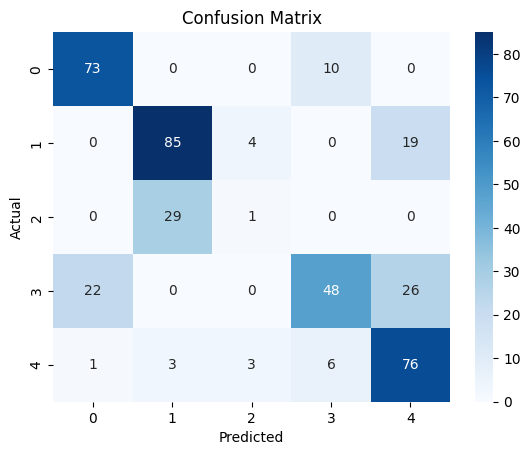

In [ ]:
# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Karışıklık Matrisini Görselleştirme
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


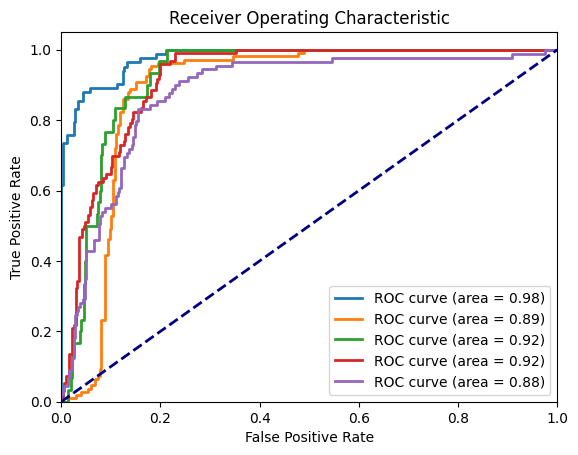

Micro-averaged ROC AUC: 0.90


In [ ]:
# ROC ve AUC (Receiver Operating Characteristic ve Area Under the Curve)

# Assuming 'y_test' and 'y_pred' are multiclass
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

y_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print micro-averaged ROC AUC score
from sklearn.metrics import roc_auc_score
y_prob_micro = model.predict_proba(X_test)
roc_auc_micro = roc_auc_score(y_test, y_prob_micro, multi_class='ovr', average='micro')
print(f"Micro-averaged ROC AUC: {roc_auc_micro:.2f}")

AUC değeri 0.90 çıkmıştır yani modelin sınıflandırma performansının iyi olduğunu gösterir.

# **Sınıflandırma için KNN Yöntemi**

In [ ]:
# Özellikleri ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# KNN modelini oluşturma ve hiperparametre ayarları
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 31), 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn, param_grid, cv=5)

In [ ]:
# Modeli eğitim verisi ile eğitme
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [ ]:
# En iyi parametreleri ve modeli bulma
best_knn = grid_search.best_estimator_
print(best_knn)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)


In [ ]:
# Test verisi ile tahmin yapma
y_pred = best_knn.predict(X_test)

In [ ]:
# Adım 1: Doğruluk (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Doğruluk: {accuracy}')

Doğruluk: 0.8423645320197044


Karışıklık Matrisi:
[[75  0  0  8  0]
 [ 0 96  4  0  8]
 [ 0  4 26  0  0]
 [ 5  0  0 69 22]
 [ 0  9  0  4 76]]


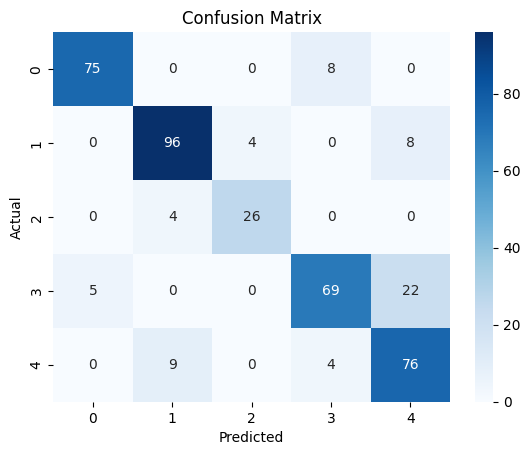

In [ ]:
# Adım 2: Karışıklık Matrisi (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Karışıklık Matrisi:\n{conf_matrix}')

# Karışıklık Matrisini Görselleştirme
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Sınıflandırma Raporu
report = classification_report(y_test, y_pred)
print(f'Sınıflandırma Raporu:\n{report}')

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       1-300       0.94      0.90      0.92        83
   1001-1400       0.88      0.89      0.88       108
       1401+       0.87      0.87      0.87        30
     301-600       0.85      0.72      0.78        96
    601-1000       0.72      0.85      0.78        89

    accuracy                           0.84       406
   macro avg       0.85      0.85      0.85       406
weighted avg       0.85      0.84      0.84       406



*GENEL PERFORMANS*

**Accuracy (0.84):** Modelin genel doğruluğu %84. Yani, model tüm test örneklerinin %84'ünü doğru sınıflandırmış.


# **Cat Boost**

In [ ]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier,VotingClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV,validation_curve
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

In [ ]:
# Özellik önem düzeylerini elde etme
feature_importances = model.get_feature_importance(Pool(X_train, label=y_train))

# Assuming 'X' is your original DataFrame
feature_names = X.columns

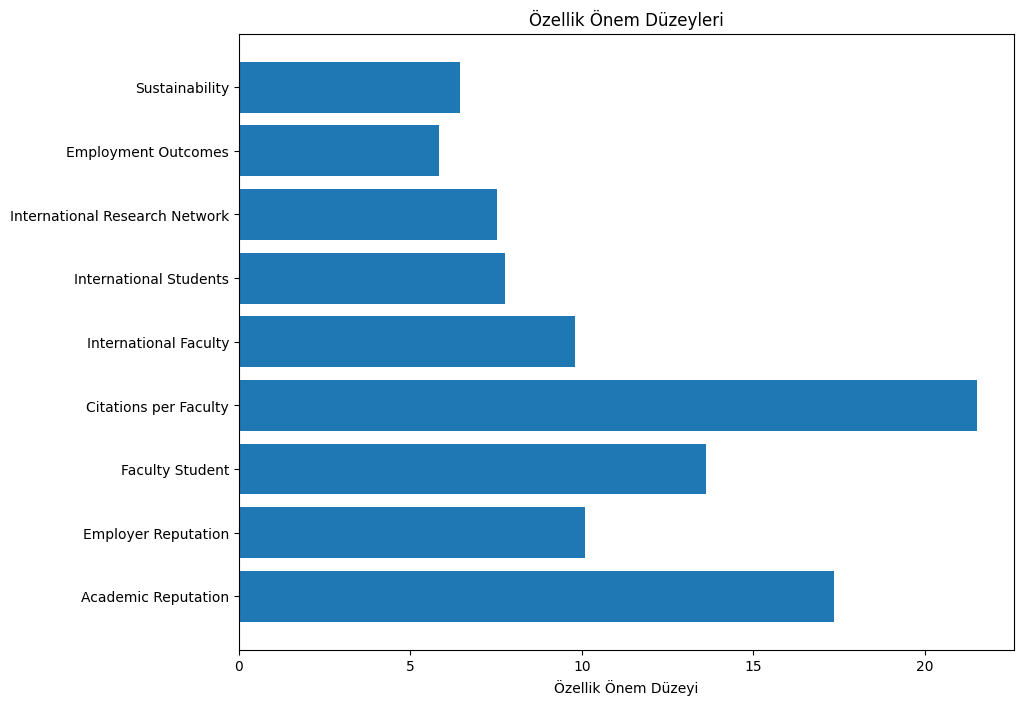

In [ ]:
# Özellik önem düzeylerini görselleştirme
plt.figure(figsize=(10, 8))
plt.barh(feature_names, feature_importances)
plt.xlabel('Özellik Önem Düzeyi')
plt.title('Özellik Önem Düzeyleri')
plt.show()

In [ ]:
cv_results = cross_validate(catboost_model, X_train, y_train, cv=5, scoring=['accuracy','f1_macro', 'roc_auc_ovr'])

In [ ]:
cv_results['test_accuracy'].mean()

0.8893511250654107

In [ ]:
cv_results['test_f1_macro'].mean()

0.8796233942426447

In [ ]:
cv_results['test_roc_auc_ovr'].mean()

0.9895582384317502

In [ ]:
catboost_params = {
    'iterations': [200, 500],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6]
}

In [ ]:
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=3, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
catboost_best_grid.best_params_


{'depth': 6, 'iterations': 500, 'learning_rate': 0.1}

In [ ]:
# Final modeli:
catboost_final=catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X_train, y_train)

In [ ]:
cv_results = cross_validate(catboost_final, X_train, y_train, cv=5, scoring=['accuracy','f1_macro', 'roc_auc_ovr'])

In [ ]:
cv_results['test_accuracy'].mean()

0.8903715332286761

In [ ]:
cv_results['test_f1_macro'].mean()

0.880490653908853

In [ ]:
cv_results['test_roc_auc_ovr'].mean()

0.9896348635414858

# **XGBoost**

In [ ]:
xgboost_model = XGBClassifier(random_state=17)

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
cv_results = cross_validate(xgboost_model, X_train, y_train_encoded, cv=5, scoring=['accuracy','f1_macro', 'roc_auc_ovr'])

In [ ]:
cv_results['test_accuracy'].mean()

0.8442700156985872

In [ ]:
cv_results['test_f1_macro'].mean()

0.8266177307318324

In [ ]:
cv_results['test_roc_auc_ovr'].mean()

0.9776974199609434

In [ ]:
xgboost_params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [5,8,None],
    'n_estimators': [100, 500, 1000],
    'colsample_bytree': [None, 0.7, 1]
}


In [ ]:
# en iyi parametreler:
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=3, n_jobs=-1, verbose=2).fit(X_train, y_train_encoded)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [ ]:
xgboost_best_grid.best_params_

{'colsample_bytree': None,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 500}

In [ ]:
# Final modeli:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X_train, y_train_encoded)

In [ ]:
cv_results = cross_validate(xgboost_final, X_train, y_train_encoded, cv=5, scoring=['accuracy','f1_macro', 'roc_auc_ovr'])

In [ ]:
cv_results['test_accuracy'].mean()

0.8432443746729461

In [ ]:
cv_results['test_f1_macro'].mean()

0.8267381349942038

In [ ]:
cv_results['test_roc_auc_ovr'].mean()

0.978060405210637